# Лабораторная работа №6 «Решение параболических уравнений»

## Дашкевич Артём Владимирович

### Скрин постановки задачи:
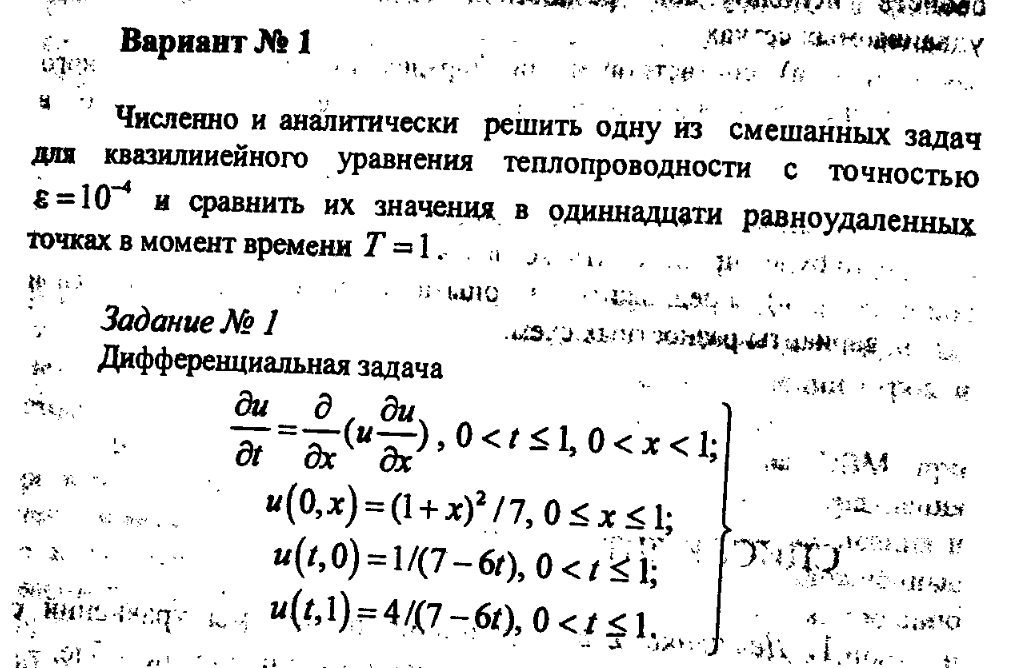

Для тестовых примеров использовалась схема:
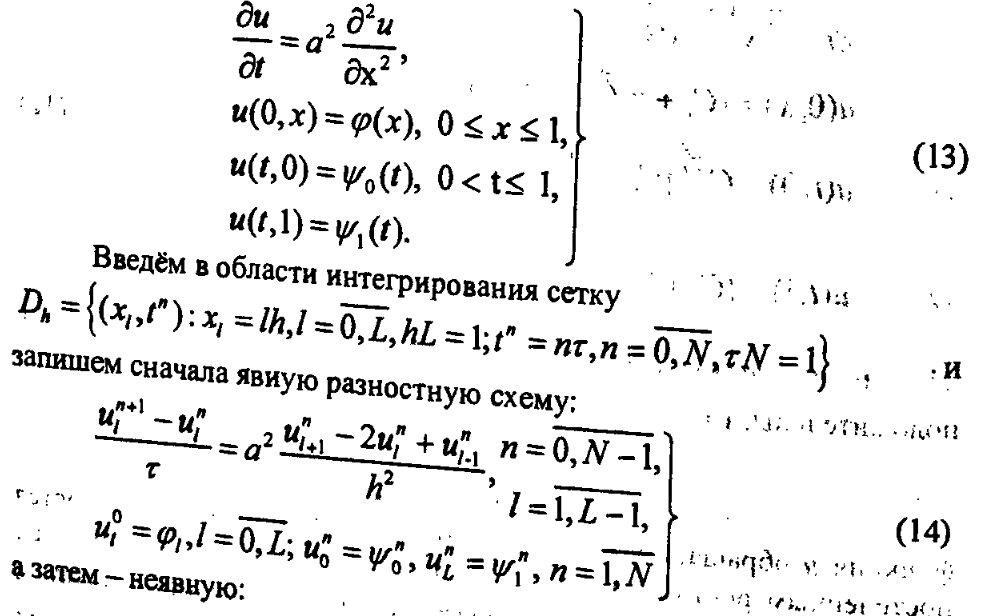
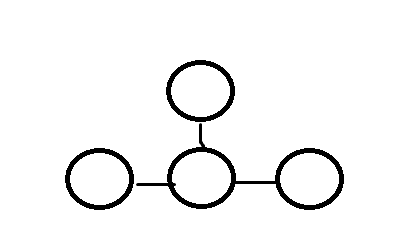

Реализация:

In [84]:
import numpy as np
import math as m

%matplotlib notebook
import matplotlib.pyplot as plt

In [85]:
h = 0.01
tau = 0.00001
a = 1

In [86]:
def find_U_upper_left(U_lower_left, U_lower_middle, U_lower_right, a, h, tau):
    return U_lower_middle + a ** 2 * tau / h ** 2 * (U_lower_right - 2 * U_lower_middle + U_lower_left)

In [87]:
def fill_solution(N, L, h, tau, a, fi, psi_0, psi_1, find_U_upper_left):
    
    solution = np.zeros((N, L))

    # fill initial conditions
    for i in range(L):
        solution[0][i] = fi(i * h)
    
    # fill border conditions
    for i in range(N):
        solution[i][0] = psi_0(i * tau)
        solution[i][-1] = psi_1(i * tau)
    
    # find solution
    for i in range(1, N):
        for j in range(1, L - 1):
            solution[i][j] = find_U_upper_left(solution[i - 1][j - 1], solution[i - 1][j], solution[i - 1][j + 1], a, h, tau)
    
    return solution

In [88]:
# function for clipping solution for plotting
def formate_solution(solution, required_size):
    step = m.trunc(len(solution) / required_size)
    new_solution = []
    i = 0
    while i * step < len(solution):
        new_solution.append(solution[i * step])
        i += 1
    
    new_tau = step * tau
    return np.array(new_solution), new_tau

In [89]:
def get_plot_params(h, tau, solution):
    t_size = len(solution)
    x_size = len(solution[0])
    x = []
    t = []
    for i in range(x_size):
        x.append(h * i)
    for i in range(t_size):
        t.append(tau * i)
    xgrid, ygrid = np.meshgrid(x, t)
    return xgrid, ygrid

In [90]:
def plot(h, tau, a, fi, psi_0, psi_1, find_U_upper_left):
    
    N = int(1/tau) + 1
    L = int(1/h) + 1
    
    solution = fill_solution(N, L, h, tau, a, fi, psi_0, psi_1, find_U_upper_left)
    formated_solution, new_tau = formate_solution(solution, len(solution[0]))
    fig = plt.figure(figsize=[12, 4])
    axes = fig.add_subplot(projection='3d')
    x, y = get_plot_params(h, new_tau, formated_solution)
    axes.plot_surface(x, y, formated_solution)
    plt.xlabel("x axis")
    plt.ylabel("t axis")
    plt.show()
    return formated_solution

Рассмотрим несколько тестовых примеров:

<IPython.core.display.Javascript object>


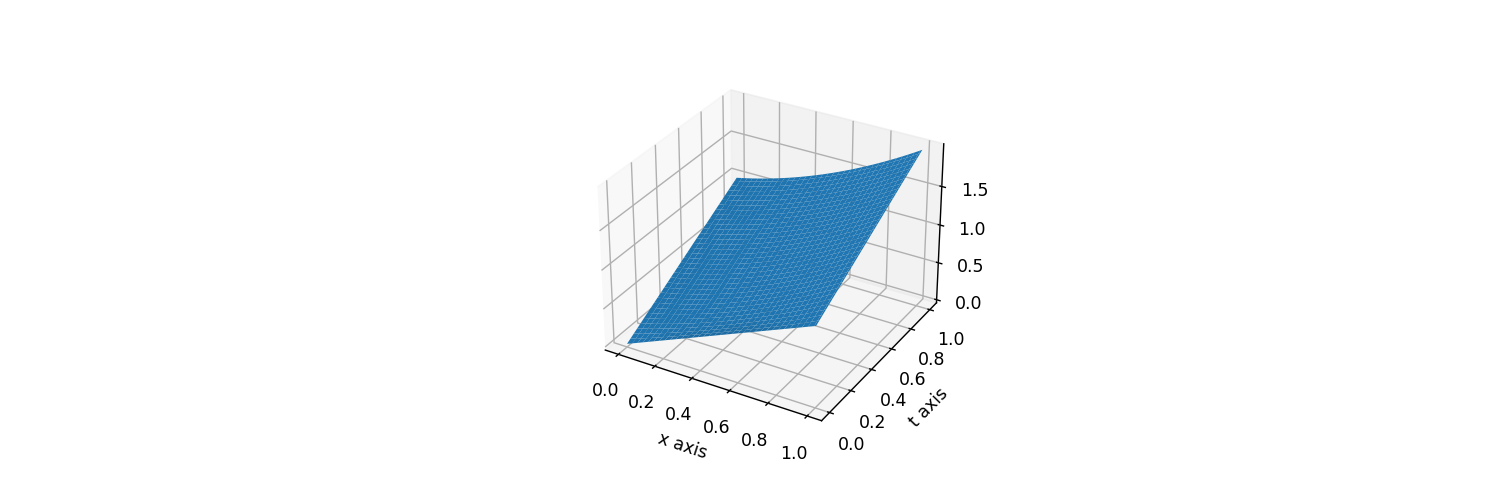

In [10]:
# Example 1
def fi(x):
    return x;
def psi_0(t):
    return t;
def psi_1(t):
    return t + 1

sol = plot(h, tau, a, fi, psi_0, psi_1, find_U_upper_left)

<IPython.core.display.Javascript object>


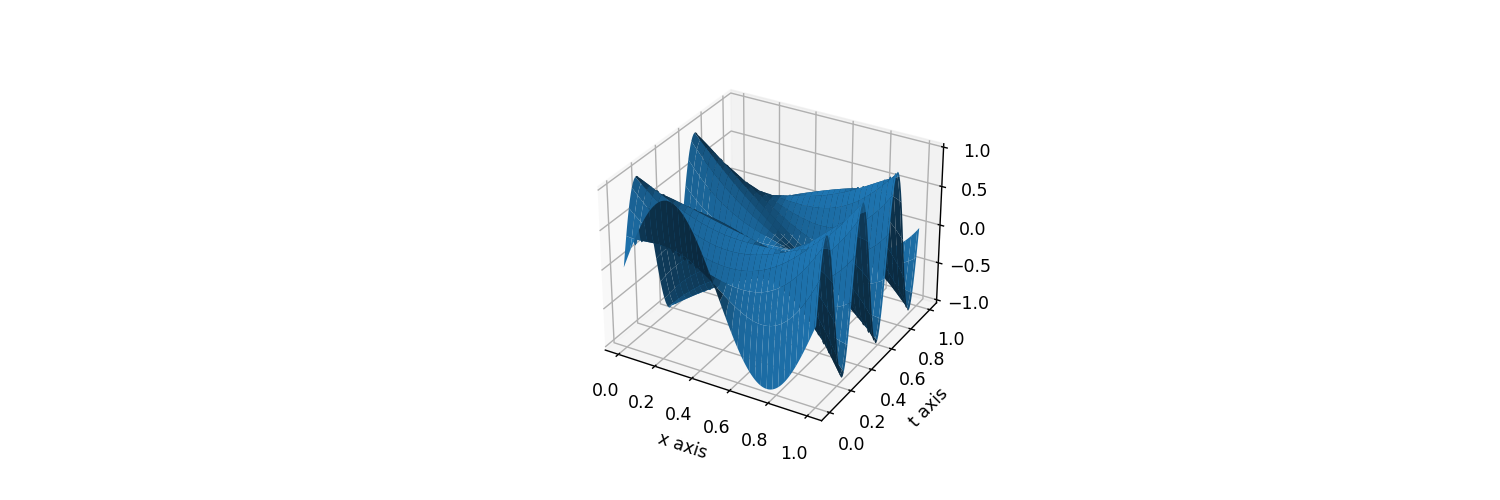

In [12]:
# Example 2

def fi(x):
    return np.sin(2 * np.pi * x);
def psi_0(t):
    return np.sin(4 * np.pi * t);
def psi_1(t):
    return np.sin(6 * np.pi * t)

sol = plot(h, tau, a, fi, psi_0, psi_1, find_U_upper_left)

In [91]:
# Example 3

def fi(x):
    return np.exp(- x ** 2)
def psi_0(t):
    return 1 / np.sqrt(1 + 4 * t)
def psi_1(t):
    return np.exp(- 1 / (1 + 4 * t)) / np.sqrt(1 + 4 * t)

In [92]:
def u_real(t, x):
    return 1 / np.sqrt(1 + 4 * t) * np.exp(- x ** 2 / (1 + 4 * t))

def plot_real_solution(h, tau, u_real):
    
    L = int(1/h) + 1
    
    solution = [[u_real(i/L, j/L) for i in range(L)] for j in range(L + 1)]
    formated_solution, new_tau = formate_solution(solution, len(solution[0]))
    fig = plt.figure(figsize=[12, 4])
    axes = fig.add_subplot(projection='3d')
    x, y = get_plot_params(h, h, formated_solution)
    axes.plot_surface(y, x, formated_solution)
    plt.xlabel("x axis")
    plt.ylabel("t axis")
    plt.show()
    return formated_solution

In [93]:
def error_func(sol, real_sol):
    error = [[len(sol)] for i in range(len(sol[0]))]
    _max = abs(sol[0][0] - real_sol[0][0])
    _max_i = 0
    _max_j = 0
    for i in range(len(error)):
        for j in range(len(error[0])):
            error[i][j] = abs(sol[i][j] - real_sol[j][i])
            this_max = error[i][j]
            if this_max > _max:
                _max = this_max
                _max_i = i
                _max_j = j
    return _max, _max_i, _max_j

<IPython.core.display.Javascript object>


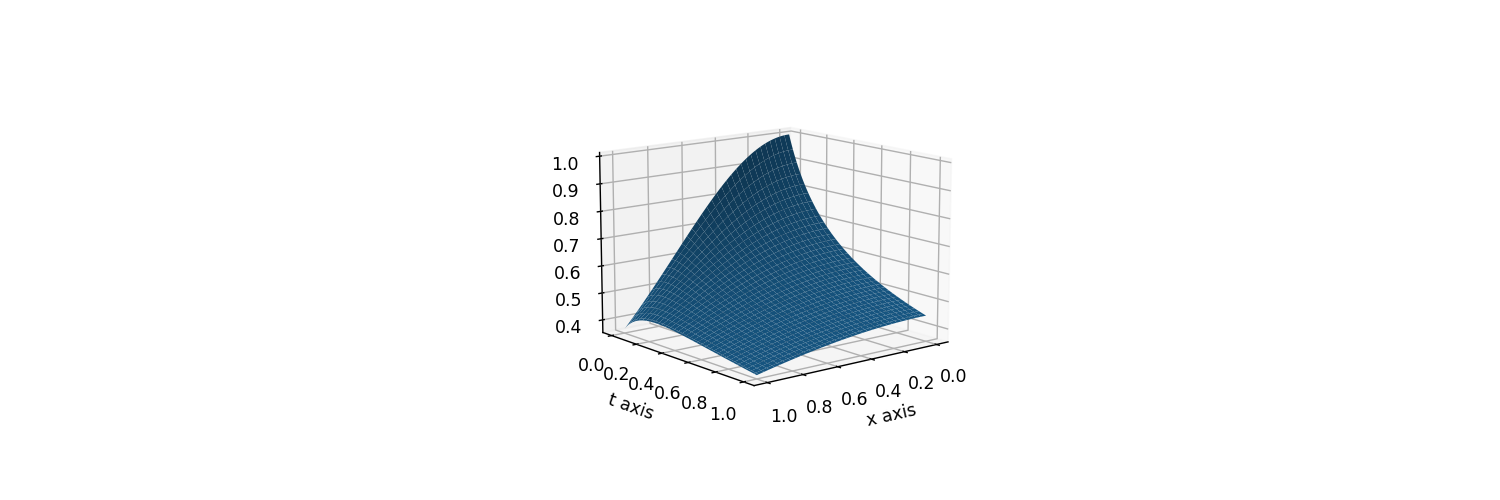

<IPython.core.display.Javascript object>


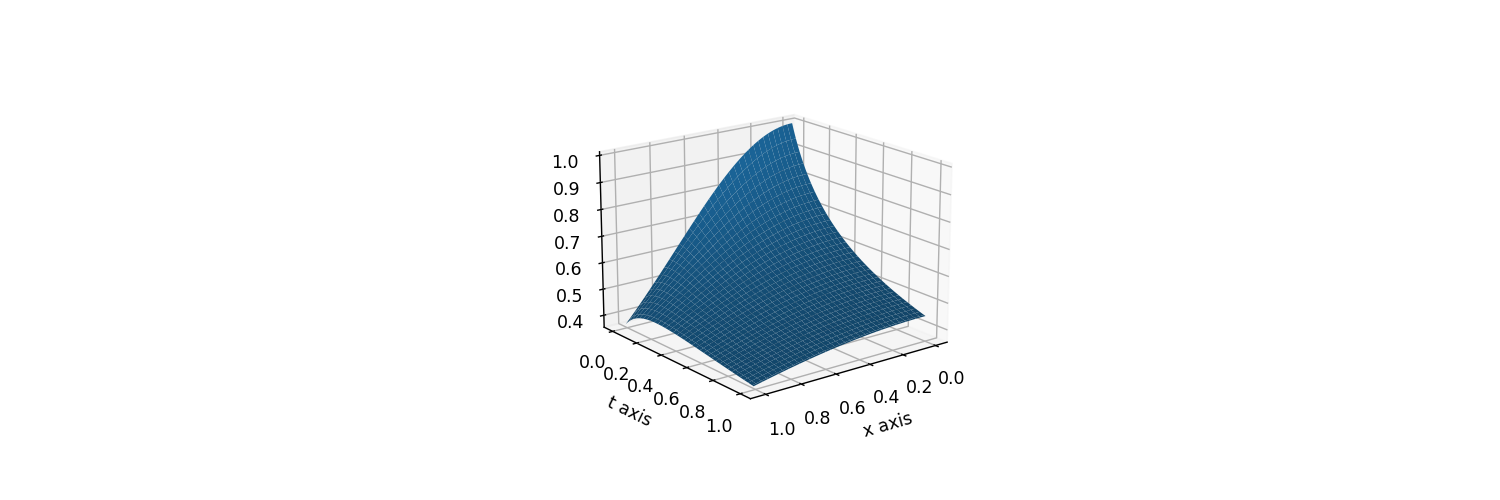

In [53]:
sol = plot(h, tau, a, fi, psi_0, psi_1, find_U_upper_left)
real_sol = plot_real_solution(0.01, 0.0001, u_real)

In [94]:
def find_error(h, tau):
    N = int(1/tau) + 1
    L = int(1/h) + 1
    solution = fill_solution(N, L, h, tau, a, fi, psi_0, psi_1, find_U_upper_left)
    formated_solution, new_tau = formate_solution(solution, len(solution[0]))
    real_solution = [[u_real(i/L, j/L) for i in range(L)] for j in range(L + 1)]
    real_formated_solution, new_tau = formate_solution(real_solution, len(real_solution[0]))
    return error_func(formated_solution, real_formated_solution)

In [95]:
h_array = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01]
errors_array = np.zeros(len(h_array))

for index in range(len(h_array)):
    h = h_array[index]
    errors_array[index] , i, j = find_error(h, h ** 2)

print(errors_array)

<ipython-input-86-8147b9d00889>:2: RuntimeWarning: overflow encountered in double_scalars
  return U_lower_middle + a ** 2 * tau / h ** 2 * (U_lower_right - 2 * U_lower_middle + U_lower_left)
<ipython-input-86-8147b9d00889>:2: RuntimeWarning: invalid value encountered in double_scalars
  return U_lower_middle + a ** 2 * tau / h ** 2 * (U_lower_right - 2 * U_lower_middle + U_lower_left)


[5.51173013e-02 7.85546679e-03 1.93203988e-03 4.81563930e-04
 7.69907067e-05 1.92456634e-05]


<IPython.core.display.Javascript object>


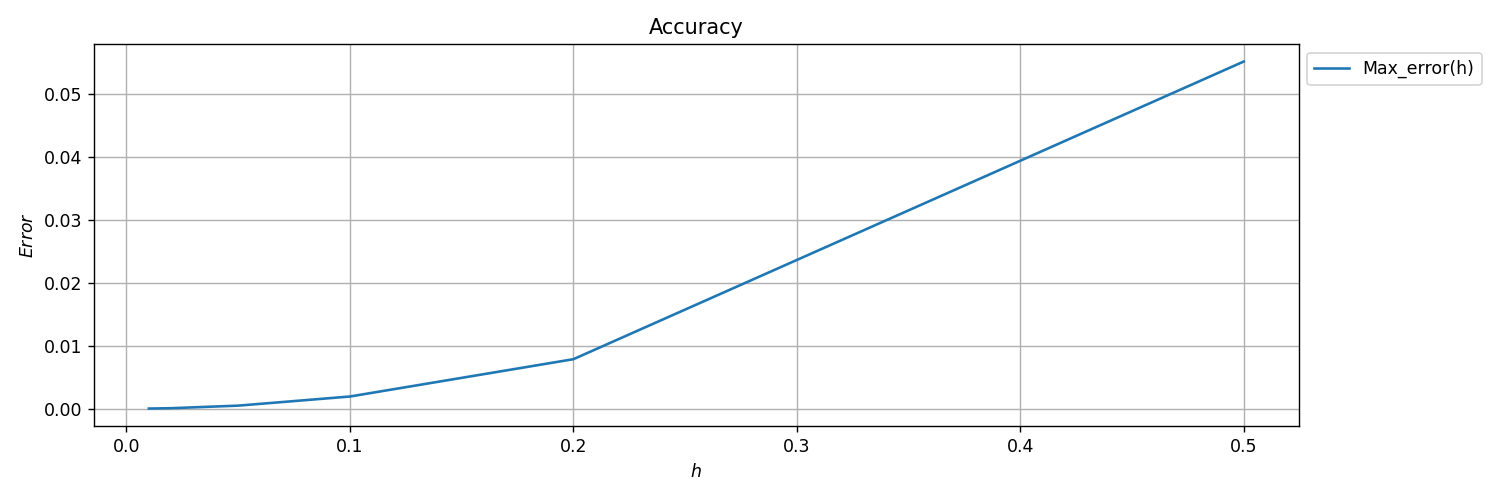

In [83]:
plt.figure(figsize=[12, 4])
plt.plot(h_array, errors_array, label='Max_error(h)')

plt.title("Accuracy")
plt.xlabel("$h$")
plt.ylabel("$Error$")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.show()

Решим уравнение из варианта 1:
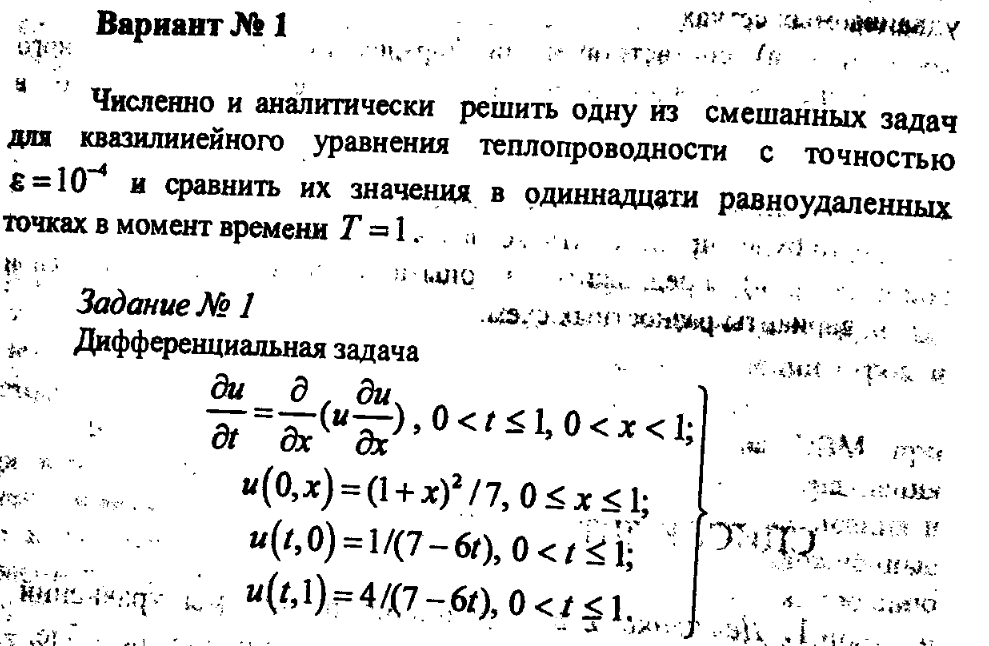

То же уравнение, переписанное явно через производные:   
$$\frac{dU}{dt} = {\frac{dU}{dx}}^2 + U\frac{d^2U}{dx^2}$$   
Подставим в неё схемы для производного 1 и 2 порядка:   
$$U'_x = \frac{U^{n}_{l+1} - U^{n}_{l-1}}{2h}$$
$$U''_{xx} = \frac{U^{n}_{l+1} - 2U^{n}_{l} + U^{n}_{l-1}}{h^2}$$    
Тогда, используя эту схему, получим решение:

<IPython.core.display.Javascript object>


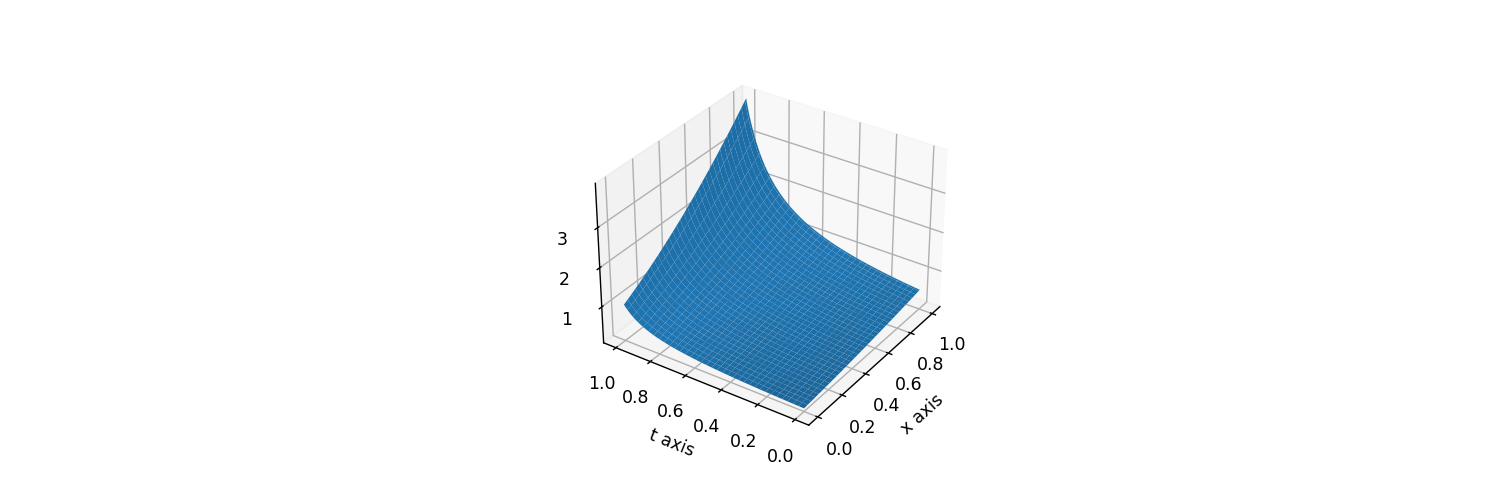

Значения в точках 0.1, 0.2, ... , 1.0:
0.99940035978413
1.209259220353651
1.4391127513176052
1.6889584032545317
1.9587949185240943
2.2486216554442615
2.5584382823610126
2.8882446307799916
3.2380406212457493
3.6078262242984116
3.99760143913652


In [460]:
# Example 3

def find_U_upper_left_v2(U_lower_left, U_lower_middle, U_lower_right, a, h, tau):
    return U_lower_middle + tau * (((U_lower_right - U_lower_left) / (2 * h)) ** 2 + U_lower_middle * (U_lower_right - 2 * U_lower_middle + U_lower_left) / h ** 2)

def fi(x):
    return (1 + x) ** 2 / 7
def psi_0(t):
    return 1 / (7 - 6 * t)
def psi_1(t):
    return 4 / (7 - 6 * t)

sol = plot(h, tau, a, fi, psi_0, psi_1, find_U_upper_left_v2)
formed_sol, new_tau = formate_solution(np.transpose(sol), 10)
print("Значения в точках 0.1, 0.2, ... , 1.0:")
for i in range(len(formed_sol)):
    print(formed_sol[i][-1])

Значения, полученные в тех же точках аналитическим путём (см. колонку Analitic):   
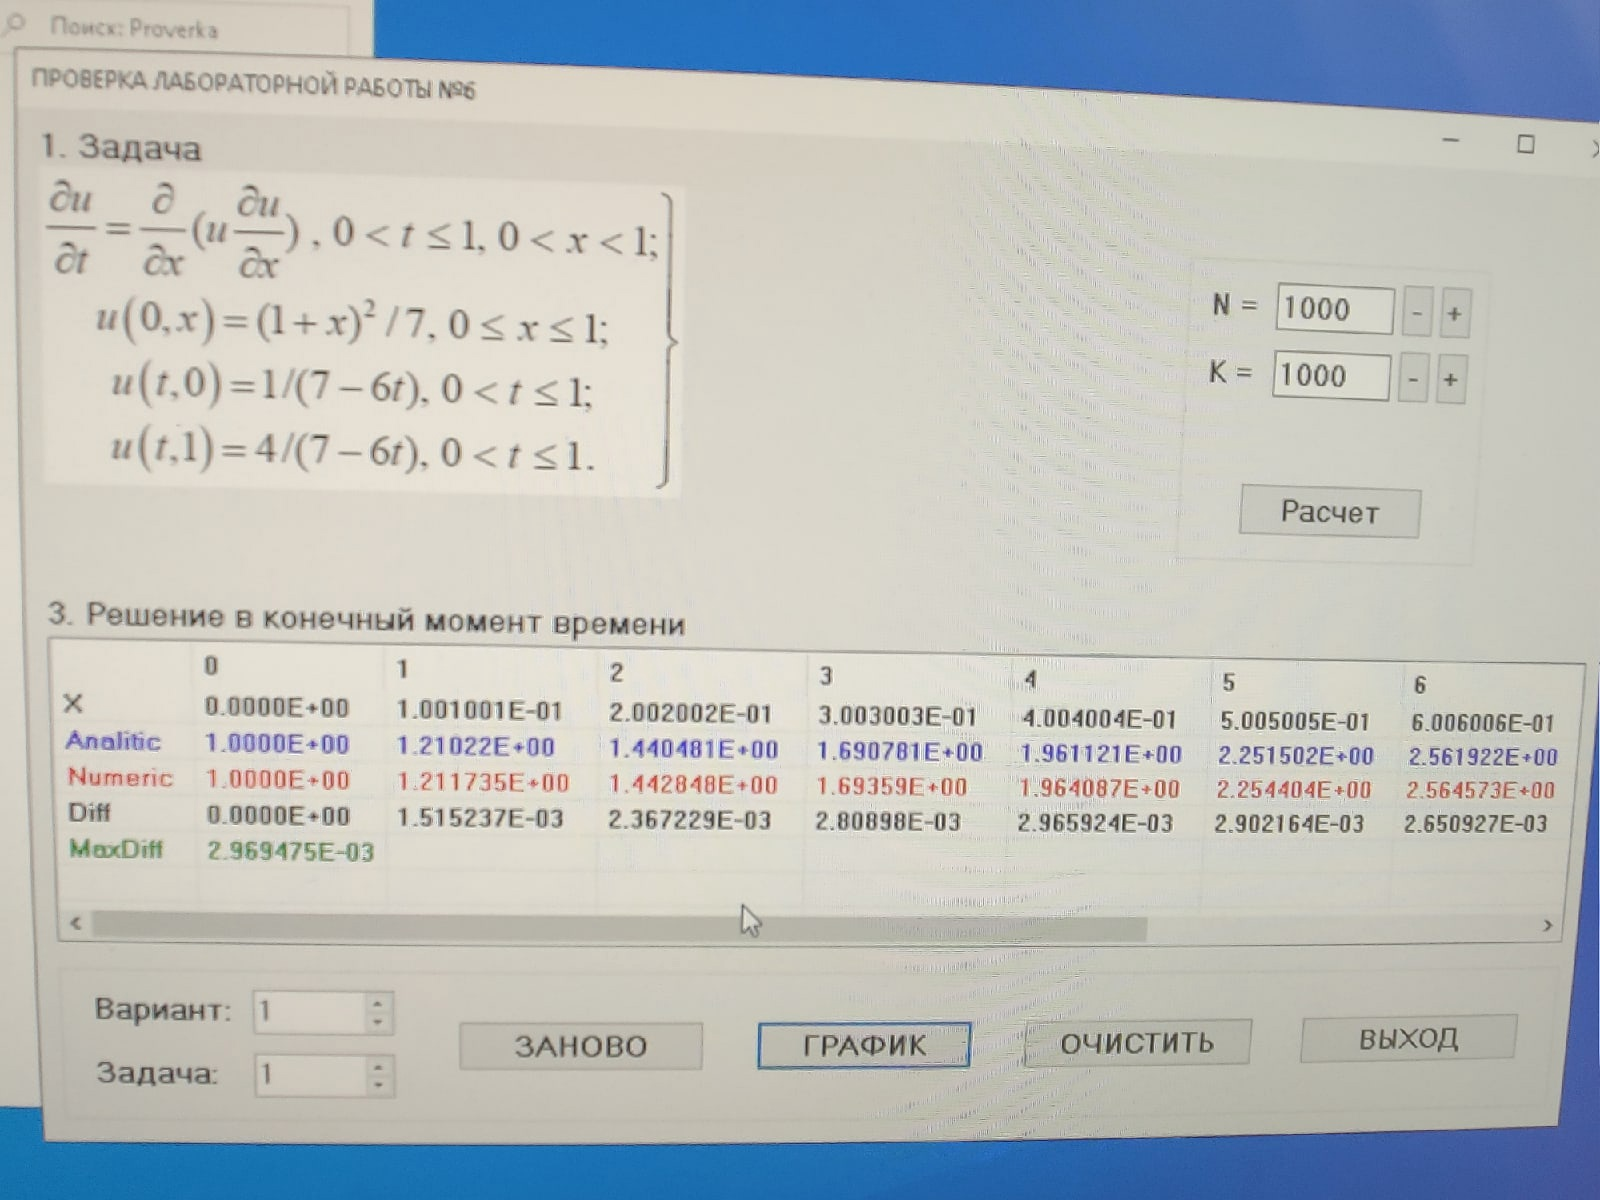
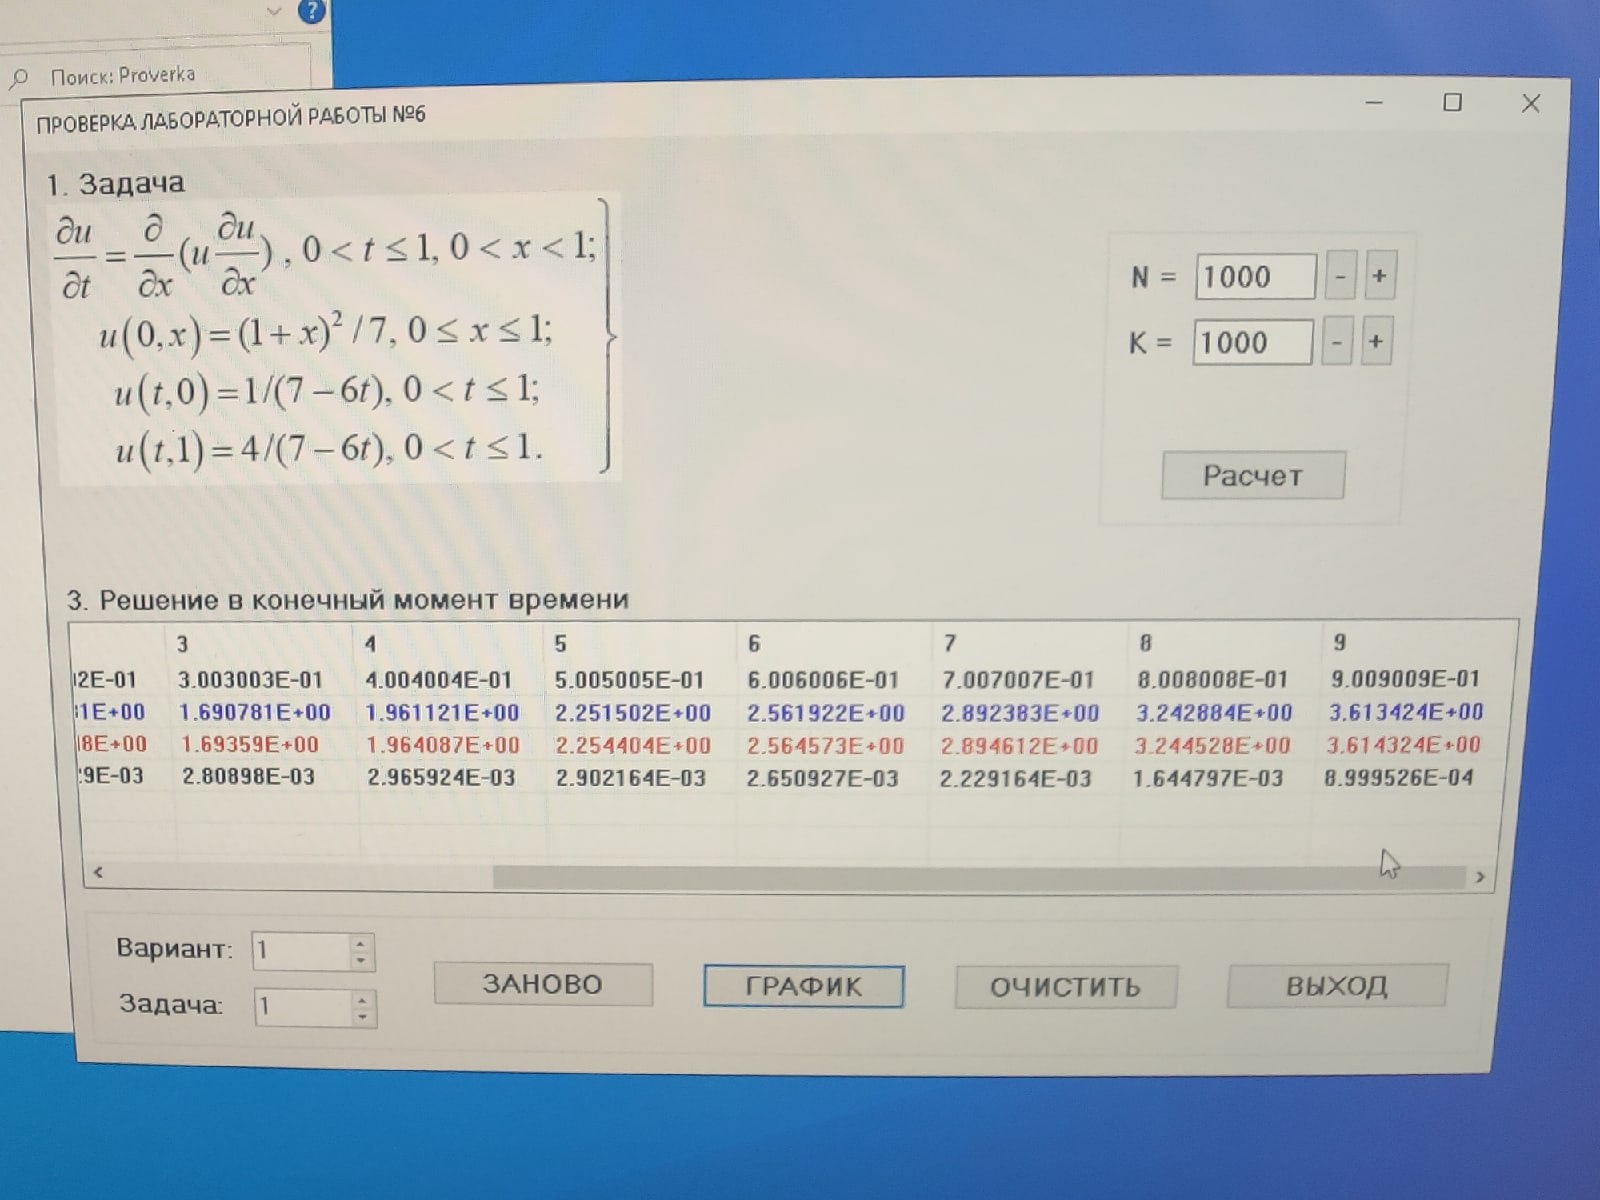

Можно заметить, что значения совпадают с хорошей точностью.